# Soviet Union

In [663]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os.path

In [664]:
filepath = '../../data/analysis/complete_data.csv'

In [665]:
if not os.path.exists( filepath ):
    print("Missing dataset file")
else:
    df = pd.read_csv(filepath , encoding = "ISO-8859-1")
    print("File Read")

File Read


In [666]:
df.head()

,Unnamed: 0,Year,Host_Country,Host_City,Summer,Winter,Total_Males,Total_Females,Total_Athletes,Discipline,...,CO2_Emissions,Methane_Emissions,Nitrous_Oxide_Emisions,Total_Emissions,Emmisions_per_Capita,Code,Lowest_Point,Highest_Point,Elevation_Range,Education_Index
0,0,1960,ITA,Rome,True,False,4727,611,5338,Sailing,...,48815.104,NaN,NaN,48815.104,NaN,ARG,-105.0,6962.0,7067.0,NaN
1,1,1960,ITA,Rome,True,False,4727,611,5338,Boxing,...,48815.104,NaN,NaN,48815.104,NaN,ARG,-105.0,6962.0,7067.0,NaN
2,2,1960,ITA,Rome,True,False,4727,611,5338,Swimming,...,88202.351,NaN,NaN,88202.351,NaN,AUS,-15.0,2228.0,2243.0,NaN
3,3,1960,ITA,Rome,True,False,4727,611,5338,Eventing,...,88202.351,NaN,NaN,88202.351,NaN,AUS,-15.0,2228.0,2243.0,NaN
4,4,1960,ITA,Rome,True,False,4727,611,5338,Swimming,...,88202.351,NaN,NaN,88202.351,NaN,AUS,-15.0,2228.0,2243.0,NaN


In [667]:
df.columns

Index(['Unnamed: 0', 'Year', 'Host_Country', 'Host_City', 'Summer', 'Winter',
       'Total_Males', 'Total_Females', 'Total_Athletes', 'Discipline', 'Sport',
       'Ath_Name', 'Gender', 'Home_Adv', 'Gold', 'Silver', 'Bronze',
       'Total_Medals', 'Ath_Rating', 'Ath_Rank', 'NOC', 'NOC_Males_Sent',
       'NOC_Females_Sent', 'NOC_Total_Sent', 'NOC_Gold', 'NOC_Silver',
       'NOC_Bronze', 'NOC_Total_Medals', 'NOC_Rating', 'NOC_Rank', 'Country',
       'Population', 'Males', 'Females', 'Life_Expectancy', 'GDP', 'Region',
       'Elevation', 'Area_SqKM', 'Centroid_Longitude', 'Centroid_Latitude',
       'Population_Density', 'CO2_Emissions', 'Methane_Emissions',
       'Nitrous_Oxide_Emisions', 'Total_Emissions', 'Emmisions_per_Capita',
       'Code', 'Lowest_Point', 'Highest_Point', 'Elevation_Range',
       'Education_Index'],
      dtype='object')

In [668]:
df = df[['Year', 'Host_Country', 'Host_City', 'Summer', 'Winter',
       'Total_Males', 'Total_Females', 'Total_Athletes', 'Discipline', 'Sport',
       'Ath_Name', 'Gender', 'Home_Adv', 'Gold', 'Silver', 'Bronze',
       'Total_Medals', 'Ath_Rating', 'NOC','Country',
       'Population', 'Males', 'Females','GDP', 'Region',
       'Elevation', 'Area_SqKM']]

df.head()

,Year,Host_Country,Host_City,Summer,Winter,Total_Males,Total_Females,Total_Athletes,Discipline,Sport,...,Ath_Rating,NOC,Country,Population,Males,Females,GDP,Region,Elevation,Area_SqKM
0,1960,ITA,Rome,True,False,4727,611,5338,Sailing,Sailing,...,2,ARG,Argentina,20619075.0,10471009.0,10148066.0,2.117186e+10,South America,595.6200,2775401.0
1,1960,ITA,Rome,True,False,4727,611,5338,Boxing,Boxing,...,1,ARG,Argentina,20619075.0,10471009.0,10148066.0,2.117186e+10,South America,595.6200,2775401.0
2,1960,ITA,Rome,True,False,4727,611,5338,Swimming,Aquatics,...,7,AUS,Australia,10276477.0,5191453.0,5085024.0,1.859335e+10,Oceania,272.4731,7662592.0
3,1960,ITA,Rome,True,False,4727,611,5338,Eventing,Equestrian,...,6,AUS,Australia,10276477.0,5191453.0,5085024.0,1.859335e+10,Oceania,272.4731,7662592.0
4,1960,ITA,Rome,True,False,4727,611,5338,Swimming,Aquatics,...,6,AUS,Australia,10276477.0,5191453.0,5085024.0,1.859335e+10,Oceania,272.4731,7662592.0


# Sets figure Settings

In [669]:
fig_size = plt.rcParams["figure.figsize"]
print ("Current size:"+str(fig_size))

Current size:[15.0, 9.0]


In [670]:
fig_size[0] = 15
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

In [671]:
plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'axes.titlepad': 30})
plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'axes.titlepad': 30})

# Grouping Athletes by Country

In [672]:
df = df.groupby(['Country','Year','Host_City','Summer','NOC'])[['Gold', 'Silver', 'Bronze','Total_Medals', 'Ath_Rating']].sum()
df = df.reset_index()
df.head()

,Country,Year,Host_City,Summer,NOC,Gold,Silver,Bronze,Total_Medals,Ath_Rating
0,Afghanistan,2008,Beijing,True,AFG,0,0,1,1,1
1,Afghanistan,2012,London,True,AFG,0,0,1,1,1
2,Algeria,1984,Los Angeles,True,ALG,0,0,2,2,2
3,Algeria,1992,Barcelone,True,ALG,1,0,1,2,4
4,Algeria,1996,Atlanta,True,ALG,2,0,1,3,7


# Columns for Rating, Medal and Gold Share

In [673]:
games = df.groupby(['Year','Host_City','Summer'])[['Gold','Total_Medals','Ath_Rating']].sum().reset_index('Summer')
games.head()

Summer  Gold  Total_Medals  Ath_Rating
Year Host_City                                           
1960 Rome            True   176           505        1016
     Squaw Valley   False    25            82         161
1964 Innsbruck      False    34           101         205
     Tokyo           True   182           543        1084
1968 Grenoble       False    40           109         226

In [674]:
df['Gold_Share'] = df.apply(lambda x: x.Gold/games.loc[x.Year].loc[x.Host_City].Gold, axis=1 )
df.head()

,Country,Year,Host_City,Summer,NOC,Gold,Silver,Bronze,Total_Medals,Ath_Rating,Gold_Share
0,Afghanistan,2008,Beijing,True,AFG,0,0,1,1,1,0.000000
1,Afghanistan,2012,London,True,AFG,0,0,1,1,1,0.000000
2,Algeria,1984,Los Angeles,True,ALG,0,0,2,2,2,0.000000
3,Algeria,1992,Barcelone,True,ALG,1,0,1,2,4,0.003546
4,Algeria,1996,Atlanta,True,ALG,2,0,1,3,7,0.006944


In [675]:
df['Medal_Share'] = df.apply(lambda x: x.Total_Medals/games.loc[x.Year].loc[x.Host_City].Total_Medals, axis=1 )
df.head()

,Country,Year,Host_City,Summer,NOC,Gold,Silver,Bronze,Total_Medals,Ath_Rating,Gold_Share,Medal_Share
0,Afghanistan,2008,Beijing,True,AFG,0,0,1,1,1,0.000000,0.001013
1,Afghanistan,2012,London,True,AFG,0,0,1,1,1,0.000000,0.001003
2,Algeria,1984,Los Angeles,True,ALG,0,0,2,2,2,0.000000,0.002736
3,Algeria,1992,Barcelone,True,ALG,1,0,1,2,4,0.003546,0.002356
4,Algeria,1996,Atlanta,True,ALG,2,0,1,3,7,0.006944,0.003460


In [676]:
df['Rating_Share'] = df.apply(lambda x: x.Ath_Rating/games.loc[x.Year].loc[x.Host_City].Ath_Rating, axis=1 )
df.head()

,Country,Year,Host_City,Summer,NOC,Gold,Silver,Bronze,Total_Medals,Ath_Rating,Gold_Share,Medal_Share,Rating_Share
0,Afghanistan,2008,Beijing,True,AFG,0,0,1,1,1,0.000000,0.001013,0.000516
1,Afghanistan,2012,London,True,AFG,0,0,1,1,1,0.000000,0.001003,0.000513
2,Algeria,1984,Los Angeles,True,ALG,0,0,2,2,2,0.000000,0.002736,0.001384
3,Algeria,1992,Barcelone,True,ALG,1,0,1,2,4,0.003546,0.002356,0.002378
4,Algeria,1996,Atlanta,True,ALG,2,0,1,3,7,0.006944,0.003460,0.004060


In [677]:
full_df = df

# Soviet Countries

In [678]:
soviets = ['URS','EUNS','EUNW','EST','LAT','LTU','UZB',
           'RUS','UKR','MDA','KGZ','KAZ','GEO','BLR','ARM',
          'TKM','AZE','TJK']

In [679]:
df = df[df.NOC.isin(soviets)]
df.head()

,Country,Year,Host_City,Summer,NOC,Gold,Silver,Bronze,Total_Medals,Ath_Rating,Gold_Share,Medal_Share,Rating_Share
21,Armenia,1996,Atlanta,True,ARM,1,1,0,2,5,0.003472,0.002307,0.002900
22,Armenia,2000,Sydney,True,ARM,0,0,1,1,1,0.000000,0.001035,0.000521
23,Armenia,2008,Beijing,True,ARM,0,1,4,5,6,0.000000,0.005066,0.003094
24,Armenia,2012,London,True,ARM,0,1,1,2,3,0.000000,0.002006,0.001538
25,Armenia,2016,Rio,True,ARM,1,3,0,4,9,0.003003,0.003918,0.004478


In [680]:
post_country = ['EST','LAT','LTU','UZB',
                'UKR','MDA','KGZ','KAZ','GEO','BLR','ARM',
                'TKM','AZE','TJK']

In [681]:
post = df[df.NOC.isin(post_country)]
post.head()

,Country,Year,Host_City,Summer,NOC,Gold,Silver,Bronze,Total_Medals,Ath_Rating,Gold_Share,Medal_Share,Rating_Share
21,Armenia,1996,Atlanta,True,ARM,1,1,0,2,5,0.003472,0.002307,0.002900
22,Armenia,2000,Sydney,True,ARM,0,0,1,1,1,0.000000,0.001035,0.000521
23,Armenia,2008,Beijing,True,ARM,0,1,4,5,6,0.000000,0.005066,0.003094
24,Armenia,2012,London,True,ARM,0,1,1,2,3,0.000000,0.002006,0.001538
25,Armenia,2016,Rio,True,ARM,1,3,0,4,9,0.003003,0.003918,0.004478


In [682]:
post = post.groupby(['Year','Host_City','Summer'])['Gold','Silver','Bronze','Total_Medals','Ath_Rating','Gold_Share','Medal_Share','Rating_Share'].sum()
post['Country'] = 'Other Nations'
post = post.reset_index()

In [683]:
df = df[~df.NOC.isin(posy_country)]
df = pd.concat([df,post])
df.head()

,Ath_Rating,Bronze,Country,Gold,Gold_Share,Host_City,Medal_Share,NOC,Rating_Share,Silver,Summer,Total_Medals,Year
873,63,4,Russian Federation,13,0.196970,Lillehammer,0.139175,RUS,0.159898,10,False,27,1994
874,152,16,Russian Federation,28,0.097222,Atlanta,0.080738,RUS,0.088167,26,True,70,1996
875,45,3,Russian Federation,10,0.140845,Nagano,0.094059,RUS,0.109223,6,False,19,1998
876,177,27,Russian Federation,30,0.094937,Sydney,0.090062,RUS,0.092188,30,True,87,2000
877,26,5,Russian Federation,5,0.058140,Salt Lake City,0.054622,RUS,0.053498,3,False,13,2002


# Summer

In [684]:
sumDF = df[df.Summer]
sumDF.head()

,Ath_Rating,Bronze,Country,Gold,Gold_Share,Host_City,Medal_Share,NOC,Rating_Share,Silver,Summer,Total_Medals,Year
874,152,16,Russian Federation,28,0.097222,Atlanta,0.080738,RUS,0.088167,26,True,70,1996
876,177,27,Russian Federation,30,0.094937,Sydney,0.090062,RUS,0.092188,30,True,87,2000
878,178,35,Russian Federation,29,0.088146,Athens,0.093878,RUS,0.091329,28,True,92,2004
880,124,24,Russian Federation,24,0.074766,Beijing,0.062817,RUS,0.063950,14,True,62,2008
882,131,29,Russian Federation,20,0.062305,London,0.070211,RUS,0.067179,21,True,70,2012


In [685]:
sumDF.loc[len(sumDF)] = [0,0,'Soviet Union',0,0,'Los Angeles',0,'URS',0,0,True,0,1984]
sumDF.tail()

C:\Users\dmagu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Ath_Rating,Bronze,Country,Gold,Gold_Share,Host_City,Medal_Share,NOC,Rating_Share,Silver,Summer,Total_Medals,Year
6,125,26,Other Nations,17,0.051672,Athens,0.068367,NaN,0.064135,24,True,67,2004
8,142,42,Other Nations,18,0.056075,Beijing,0.084093,NaN,0.073234,23,True,83,2008
10,128,36,Other Nations,18,0.056075,London,0.073220,NaN,0.065641,19,True,73,2012
12,146,43,Other Nations,15,0.045045,Rio,0.085211,NaN,0.072637,29,True,87,2016
21,0,0,Soviet Union,0,0.000000,Los Angeles,0.000000,URS,0.000000,0,True,0,1984


In [686]:
pivot_df = sumDF.pivot(index='Year', columns='Country', values='Ath_Rating')
pivot_df

Country,Other Nations,Russian Federation,Soviet Union,Unified Team
Year,,,,
1960,NaN,NaN,230.0,NaN
1964,NaN,NaN,203.0,NaN
1968,NaN,NaN,200.0,NaN
1972,NaN,NaN,260.0,NaN
1976,NaN,NaN,262.0,NaN
1980,NaN,NaN,466.0,NaN
1984,NaN,NaN,0.0,NaN
1988,NaN,NaN,291.0,NaN
1992,13.0,NaN,NaN,272.0


In [687]:
pivot_df.columns

Index(['Other Nations', 'Russian Federation', 'Soviet Union', 'Unified Team'], dtype='object', name='Country')

In [688]:
colors = ['Grey','#DE282E','#FF2400','#f5ff00']

In [689]:
ave = df[df.Country == 'Soviet Union']
ave = ave[ave.Year != 1980]
aveSov = ave[ave.Summer].Ath_Rating.mean()

In [690]:
ave = df[df.Country != 'Soviet Union']
ave = ave.groupby(['Year','Summer'])[['Ath_Rating']].sum().reset_index('Summer')
aveNotSov = ave[ave.Summer].Ath_Rating.mean()

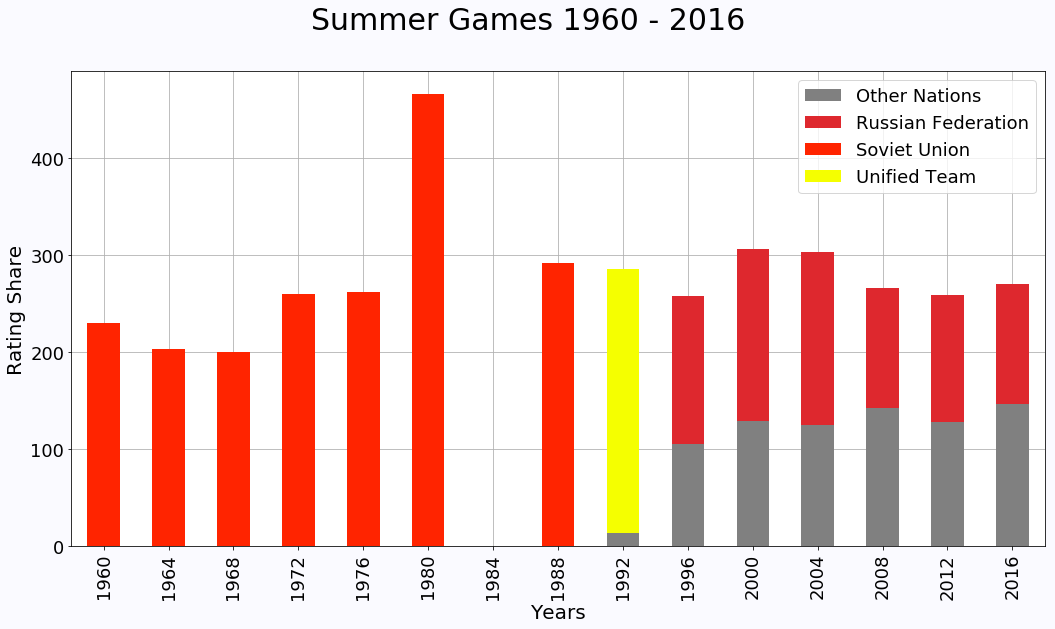

In [692]:
fig, ax = plt.subplots(facecolor='#fafaff')
pivot_df.plot(kind='bar', stacked=True,color=colors,ax=ax)
plt.grid()
plt.legend()
plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'axes.titlepad': 30})
plt.ylabel('Rating Share',fontsize=20)
plt.xlabel('Years',fontsize=20)
ax.set_axisbelow(True)
fig.suptitle('Summer Games 1960 - 2016', fontsize=30)
fig.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()
fig.savefig('../../data/final/Graphs/SovietRatingSummer.png')

# Winter

In [572]:
winDF = df[~df.Summer]

In [598]:
pivot_df = winDF.pivot(index='Year', columns='Country', values='Ath_Rating')
pivot_df

Country,Other Nations,Russian Federation,Soviet Union,Unified Team
Year,,,,
1960,NaN,NaN,39.0,NaN
1964,NaN,NaN,60.0,NaN
1968,NaN,NaN,31.0,NaN
1972,NaN,NaN,48.0,NaN
1976,NaN,NaN,73.0,NaN
1980,NaN,NaN,57.0,NaN
1984,NaN,NaN,51.0,NaN
1988,NaN,NaN,78.0,NaN
1992,NaN,NaN,NaN,50.0


In [599]:
pivot_df.columns

Index(['Other Nations', 'Russian Federation', 'Soviet Union', 'Unified Team'], dtype='object', name='Country')

In [600]:
colors = ['Grey','#DE282E','#FF2400','#f5ff00']

In [603]:
ave = df[df.Country == 'Soviet Union']
aveSov = ave[~ave.Summer].Ath_Rating.mean()

In [604]:
ave = df[df.Country != 'Soviet Union']
ave = ave.groupby(['Year','Summer'])[['Ath_Rating']].sum().reset_index('Summer')
aveNotSov = ave[~ave.Summer].Ath_Rating.mean()

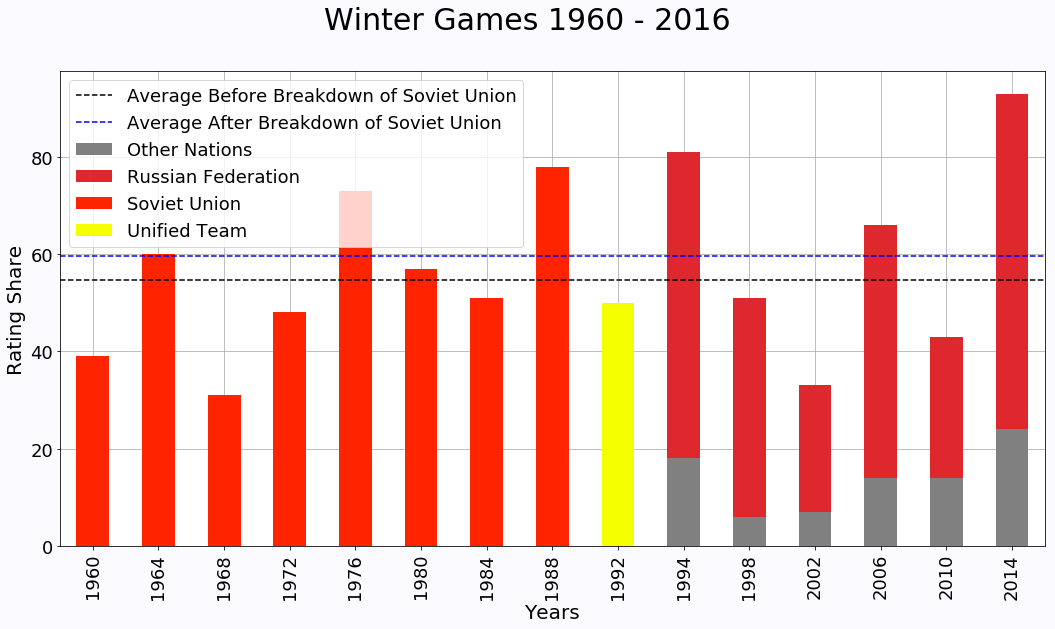

In [605]:
fig, ax = plt.subplots(facecolor='#fafaff')
pivot_df.plot(kind='bar', stacked=True,color=colors,ax=ax)
plt.axhline(y=aveSov, color='k', linestyle='--',label='Average Before Breakdown of Soviet Union')
plt.axhline(y=aveNotSov, color='b', linestyle='--',label='Average After Breakdown of Soviet Union')
plt.grid()
plt.legend()
plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'axes.titlepad': 30})
plt.ylabel('Rating Share',fontsize=20)
plt.xlabel('Years',fontsize=20)
ax.set_axisbelow(True)
fig.suptitle('Winter Games 1960 - 2016', fontsize=30)
fig.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()

# Other Top 5 Countries

In [606]:
full_df.head()

,Country,Year,Host_City,Summer,NOC,Gold,Silver,Bronze,Total_Medals,Ath_Rating,Gold_Share,Medal_Share,Rating_Share
0,Afghanistan,2008,Beijing,True,AFG,0,0,1,1,1,0.000000,0.001013,0.000516
1,Afghanistan,2012,London,True,AFG,0,0,1,1,1,0.000000,0.001003,0.000513
2,Algeria,1984,Los Angeles,True,ALG,0,0,2,2,2,0.000000,0.002736,0.001384
3,Algeria,1992,Barcelone,True,ALG,1,0,1,2,4,0.003546,0.002356,0.002378
4,Algeria,1996,Atlanta,True,ALG,2,0,1,3,7,0.006944,0.003460,0.004060


## Summer

In [607]:
top = full_df[full_df.Summer].groupby(['Country','NOC'])[['Ath_Rating']].mean().sort_values('Ath_Rating',ascending=False).reset_index()
top = top[~top.NOC.isin(soviets)].head(7)
topFive = top.NOC.unique()

Due to Germany taking on three forms in the top five remaining countries we will take the top 7 Teams

In [608]:
comp = full_df[full_df.NOC.isin(topFive)]
comp.head()

,Country,Year,Host_City,Summer,NOC,Gold,Silver,Bronze,Total_Medals,Ath_Rating,Gold_Share,Medal_Share,Rating_Share
26,Australia,1960,Rome,True,AUS,9,12,8,29,59,0.051136,0.057426,0.058071
27,Australia,1964,Tokyo,True,AUS,6,3,14,23,38,0.032967,0.042357,0.035055
28,Australia,1968,Mexico,True,AUS,5,8,6,19,37,0.024631,0.034173,0.032657
29,Australia,1972,Munich,True,AUS,8,7,2,17,40,0.036199,0.026398,0.030912
30,Australia,1976,Montréal,True,AUS,0,1,4,5,6,0.000000,0.007669,0.004587


In [609]:
comp.Country = comp.Country.replace(['United Team of Germany', 'Germany (Split)'], 'Germany')

C:\Users\dmagu\Anaconda3\lib\site-packages\pandas\core\generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [610]:
pivot_df = comp[comp.Summer].pivot(index='Year', columns='Country', values='Ath_Rating')
pivot_df

Country,Australia,China,Germany,United Kingdom,United States
Year,,,,,
1960,59.0,NaN,95.0,33.0,177.0
1964,38.0,NaN,112.0,35.0,205.0
1968,37.0,NaN,103.0,31.0,251.0
1972,40.0,NaN,210.0,36.0,225.0
1976,6.0,NaN,310.0,24.0,229.0
1980,21.0,NaN,272.0,39.0,NaN
1984,47.0,73.0,122.0,62.0,425.0
1988,27.0,44.0,325.0,51.0,231.0
1992,52.0,103.0,188.0,35.0,241.0


In [611]:
colors = ['#aa381e','#000000','#009246','#002868','#0052A5']

In [612]:
ave = comp[comp.Year <= 1976]
ave = ave.groupby(['Year','Summer'])[['Ath_Rating']].sum().reset_index('Summer')
avePre = ave[ave.Summer].Ath_Rating.mean()
avePre

451.2

In [613]:
ave = comp[comp.Year > 1988]
ave = ave.groupby(['Year','Summer'])[['Ath_Rating']].sum().reset_index('Summer')
avePost= ave[ave.Summer].Ath_Rating.mean()
avePost

690.8571428571429

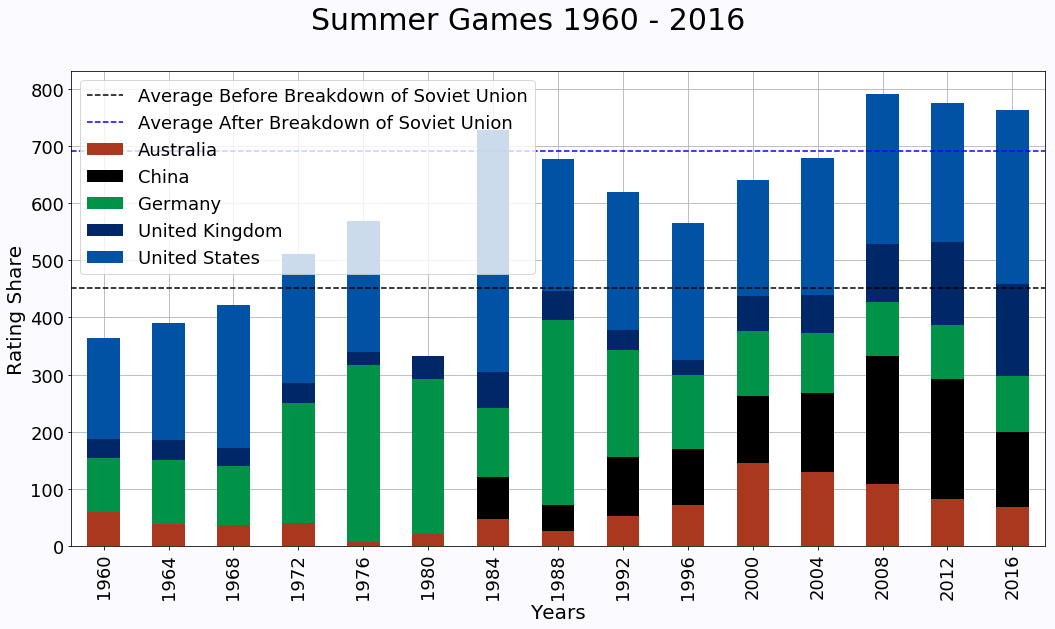

In [614]:
fig, ax = plt.subplots(facecolor='#fafaff')
pivot_df.plot(kind='bar', stacked=True,color=colors,ax=ax)
plt.axhline(y=avePre, color='k', linestyle='--',label='Average Before Breakdown of Soviet Union')
plt.axhline(y=avePost, color='b', linestyle='--',label='Average After Breakdown of Soviet Union')
plt.grid()
plt.legend()
plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'axes.titlepad': 30})
plt.ylabel('Rating Share',fontsize=20)
plt.xlabel('Years',fontsize=20)
ax.set_axisbelow(True)
fig.suptitle('Summer Games 1960 - 2016', fontsize=30)
fig.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()

## Winter

In [620]:
top = full_df[~full_df.Summer].groupby(['Country','NOC'])[['Ath_Rating']].mean().sort_values('Ath_Rating',ascending=False).reset_index()
top = top[~top.NOC.isin(soviets)].head(7)
topFive = top.NOC.unique()
top

,Country,NOC,Ath_Rating
0,Germany,GER,65.000000
4,Germany (Split),GERS,46.666667
5,Norway,NOR,39.533333
6,United States,USA,28.000000
7,Austria,AUT,22.466667
8,"Korea, Rep.",KOR,20.428571
9,Canada,CAN,20.200000


In [621]:
comp = full_df[full_df.NOC.isin(topFive)]
comp.head()

,Country,Year,Host_City,Summer,NOC,Gold,Silver,Bronze,Total_Medals,Ath_Rating,Gold_Share,Medal_Share,Rating_Share
47,Austria,1960,Rome,True,AUT,1,1,0,2,5,0.005682,0.003960,0.004921
48,Austria,1960,Squaw Valley,False,AUT,1,2,3,6,10,0.040000,0.073171,0.062112
49,Austria,1964,Innsbruck,False,AUT,3,5,3,11,22,0.088235,0.108911,0.107317
50,Austria,1968,Grenoble,False,AUT,3,4,4,11,21,0.075000,0.100917,0.092920
51,Austria,1968,Mexico,True,AUT,0,2,2,4,6,0.000000,0.007194,0.005296


In [622]:
comp.Country = comp.Country.replace(['United Team of Germany', 'Germany (Split)'], 'Germany')

C:\Users\dmagu\Anaconda3\lib\site-packages\pandas\core\generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [623]:
pivot_df = comp[~comp.Summer].pivot(index='Year', columns='Country', values='Ath_Rating')
pivot_df

Country,Austria,Canada,Germany,"Korea, Rep.",Norway,United States
Year,,,,,,
1960,10.0,9.0,NaN,NaN,17.0,17.0
1964,22.0,6.0,NaN,NaN,27.0,11.0
1968,21.0,6.0,20.0,NaN,46.0,10.0
1972,9.0,2.0,29.0,NaN,27.0,16.0
1976,12.0,6.0,48.0,NaN,16.0,19.0
1980,12.0,3.0,61.0,NaN,17.0,28.0
1984,1.0,9.0,61.0,NaN,25.0,20.0
1988,19.0,5.0,61.0,NaN,9.0,11.0
1992,39.0,16.0,64.0,15.0,53.0,22.0


In [624]:
colors = ['#aa381e','#000000','#009246','#002868','#0052A5']

In [625]:
ave = comp[comp.Year <= 1988]
ave = ave.groupby(['Year','Summer'])[['Ath_Rating']].sum().reset_index('Summer')
avePre = ave[~ave.Summer].Ath_Rating.mean()
avePre

93.5

In [628]:
ave = comp[comp.Year > 1988]
ave = ave.groupby(['Year','Summer'])[['Ath_Rating']].sum().reset_index('Summer')
avePost= ave[~ave.Summer].Ath_Rating.mean()
avePost

254.71428571428572

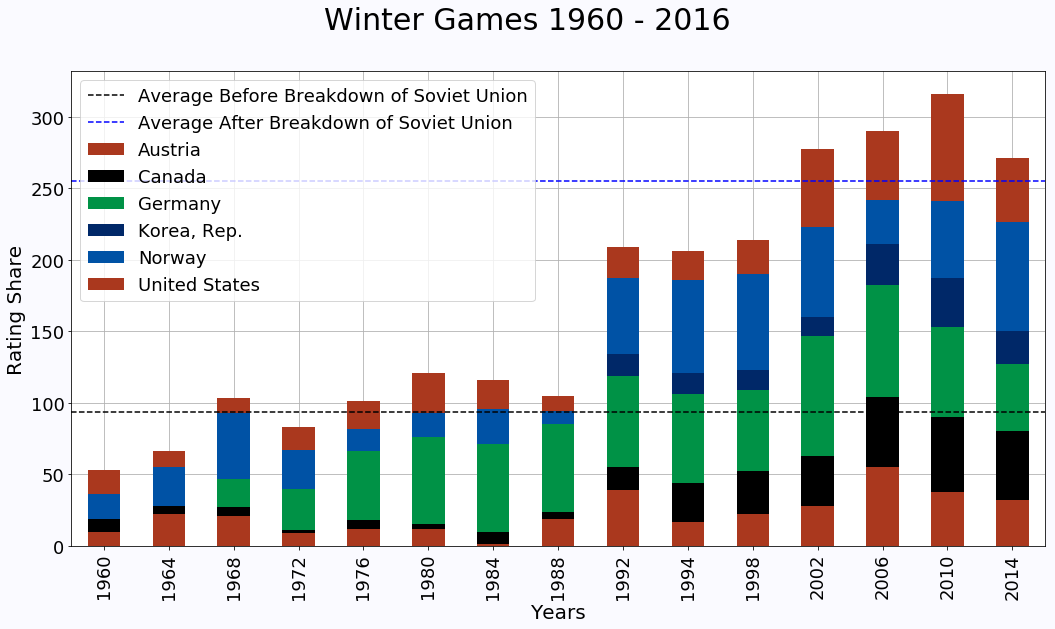

In [629]:
fig, ax = plt.subplots(facecolor='#fafaff')
pivot_df.plot(kind='bar', stacked=True,color=colors,ax=ax)
plt.axhline(y=avePre, color='k', linestyle='--',label='Average Before Breakdown of Soviet Union')
plt.axhline(y=avePost, color='b', linestyle='--',label='Average After Breakdown of Soviet Union')
plt.grid()
plt.legend()
plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'axes.titlepad': 30})
plt.ylabel('Rating Share',fontsize=20)
plt.xlabel('Years',fontsize=20)
ax.set_axisbelow(True)
fig.suptitle('Winter Games 1960 - 2016', fontsize=30)
fig.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()

# United States

In [693]:
statesDF = full_df[full_df.Country == 'United States']

## Summer

In [694]:
pivot_df = statesDF[statesDF.Summer].pivot(index='Year', columns='Country', values='Ath_Rating')
pivot_df.loc[1980] = 0
pivot_df = pivot_df.sort_index()
pivot_df.head()


Country,United States
Year,
1960,177
1964,205
1968,251
1972,225
1976,229


In [695]:
comp = statesDF[statesDF.Summer]

In [696]:
ave = comp[comp.Year <= 1976]
ave = ave.groupby(['Year'])[['Ath_Rating']].sum()
avePre = ave.Ath_Rating.mean()
avePre

217.4

In [697]:
ave = comp[comp.Year >= 1988]
ave = ave.groupby(['Year'])[['Ath_Rating']].sum()
avePost = ave.Ath_Rating.mean()
avePost

245.875

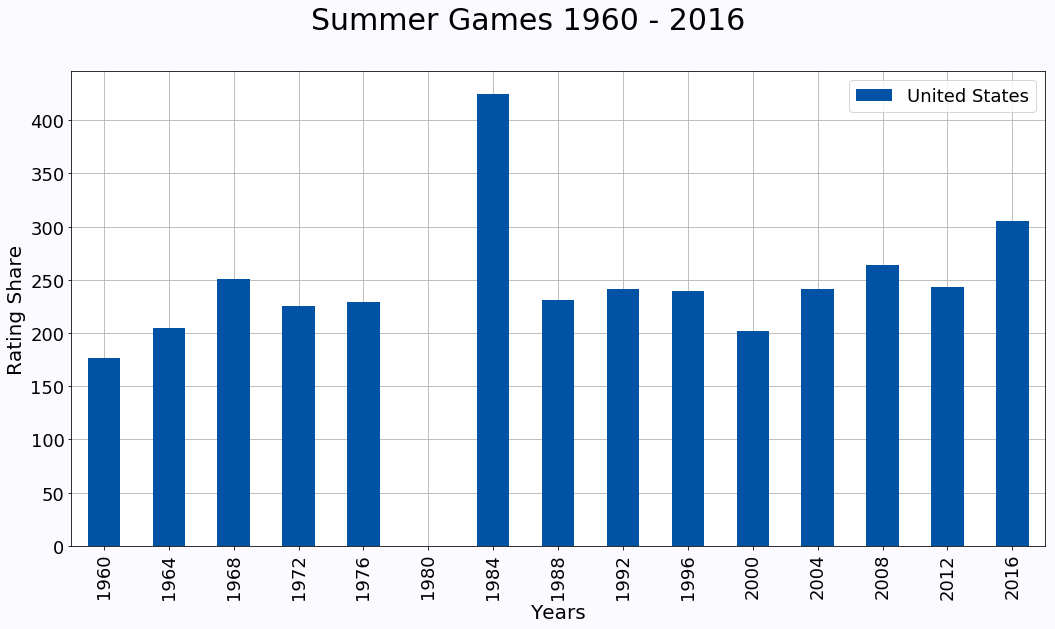

In [701]:
fig, ax = plt.subplots(facecolor='#fafaff')
pivot_df.plot(kind='bar', stacked=True,color='#0052A5',ax=ax)
plt.grid()
plt.legend()
plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'axes.titlepad': 30})
plt.ylabel('Rating Share',fontsize=20)
plt.xlabel('Years',fontsize=20)
ax.set_axisbelow(True)
fig.suptitle('Summer Games 1960 - 2016', fontsize=30)
fig.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()
fig.savefig('../../data/final/Graphs/AmericaRatingSummer.png')